In [42]:
# Import Dependencies
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
from config import gkey

In [2]:
# Set File path for original Data Set
shark_attack_csv = 'data_files/attacks.csv'

In [3]:
# Read CSV into a Data Frame
shark_df = pd.read_csv(shark_attack_csv, encoding='iso-8859-1')

In [4]:
shark_df.shape

(6302, 24)

In [6]:
# Removes two unneccessary columns
del shark_df['Unnamed: 22']
del shark_df['Unnamed: 23']
del shark_df['Case Number']
del shark_df['Investigator or Source']
del shark_df['href formula']
del shark_df['href']
del shark_df['Case Number.1']
del shark_df['Case Number.2']
del shark_df['original order']
del shark_df['pdf']
del shark_df['Name']

In [7]:
# Update columns that have extra spaces
shark_df = shark_df.rename(columns={"Sex ": "Sex", "Species ": "Species"})

In [8]:
# Update blank cells in columns to "Unknown" instead of dropping those rows
shark_df['Species'] = shark_df['Species'].replace({np.nan: 'Non-Disclosed'})
shark_df["Sex"] = shark_df["Sex"].replace({np.nan: "Non-Disclosed"})

In [9]:
# Standard values in column "Fatal (Y/N)"
shark_df["Fatal (Y/N)"] = shark_df["Fatal (Y/N)"].replace({np.nan: "Uncomfirmed", "UNKNOWN": "Uncomfirmed", " N": "N", 
                                                           "2017": "Uncomfirmed", "M": "Uncomfirmed", "N ": "N", "y": "Y"})

# Activity 

In [10]:
# Need to standardize list of activities to fix spelling errors and group similar activities
activities = shark_df["Activity"].unique()
for activity in activities:
    print(activity)

Paddling
Standing
Surfing
Free diving
Kite surfing
Swimming
Fishing
Walking
Feeding sharks
Boogie boarding
Scuba diving
Paddle-skiing
Body boarding
Windsurfing
Stand-Up Paddleboarding
Wading
Scuba Diving
Kayak fishing for sharks
Cleaning fish
Snorkeling
Spearfishing
nan
Diving
Fishing / Wading
2 boats capsized
Night bathing
Surfing 
Kayaking / Fishing
Kayaking
Body surfing
Swimming, poaching abalone
Canoeing
SUP
Skimboarding
Touching a shark
Fishing 
Attempting to lasso a shark
Photo shoot
Paddle boarding
Kakaying
Washing hands
Grabbing shark for a selfie
Kayak fishing
Tagging sharks
Surf skiing 
Surf fishing
Floating
Cage Diving
Surfng
SUP Foil boarding
Lobstering
Fishing in Alabama Deep Fishing Rodeo
Fishing for squid
Fishing for sharks
Floating in tube
Teasing a shark
Surf-skiing
Diving for beche-de-mer
Feeding stingrays?
Kayak Fishing
Sea disaster
Lobster fishing
Swimming / Wading
Fishing for shrimp
Photographing fish
Scallop diving on hookah
Treading water
Body boarding 
Playing i

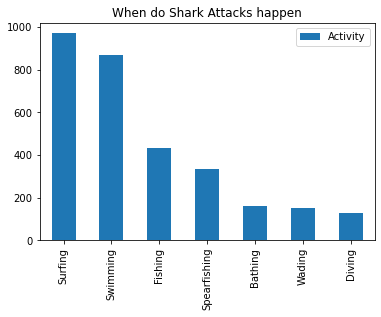

In [11]:
shark_activity=shark_df["Activity"].value_counts().to_frame()
activity_df=shark_activity[shark_activity['Activity']>100]
activity_df.plot(kind="bar",title="When do Shark Attacks happen")
plt.show()

# Species 


In [12]:
# Need to standardize list of species to remove sizes and non-species to 'Non-Disclosed'
sharks = shark_df["Species"].unique()
for shark in sharks:
    print(shark)

White shark
Non-Disclosed
2 m shark
Tiger shark, 3m
Tiger shark
Lemon shark, 3'
Bull shark, 6'
Grey reef shark
Invalid incident
Tawny nurse shark, 2m
Shark involvement not confirmed
Questionable
3 m shark
White shark, 3.5 m
White shark, 2.5 m
6' shark
Juvenile bull shark
Bull shark
Tiger shark, 12'
Wobbegong shark
3.5 m shark
1.8 m shark
Blacktip shark
Juvenile white shark,  2.7 to 3.2 m
Bull shark, 2 m
Possibly a wobbegong
Injury believed caused by an eel, not a shark
Galapagos shark?
2m shark
Bull shark, 3 m 
Grey reef shark. 2 m
small shark
Wobbegong shark?
Juvenile nurse shark
Nurse shark. 5'
Tiger shark, female
Some drowned but other may have been killed by blue sharks
White shark, 4.6 m
Cookiecutter shark
Wobbegong shark, 1 m
White shark, 4.5 m
Spinner shark, 4 to 5 feet
Tiger shark, 8 to 10 feet
8' shark
Death may have been due to drowning
5' shark
4' to 5' shark
Porbeagle, 1.5 m
White shark, 3.5m
5' to 6' shark
White shark, 3 to 3.5m 
Nurse shark
White shark, 3 m
Shark involvem

In [13]:
shark_df['Species'].value_counts()

Non-Disclosed                                         2838
White shark                                            163
Shark involvement prior to death was not confirmed     105
Invalid                                                102
Shark involvement not confirmed                         88
                                                      ... 
Spinner shark, 6'                                        1
Bronze whaler shark, 2.4 m [8']                          1
Hammerhead shark, 5.2 m [17']                            1
1.5 m [5'] hammerhead shark                              1
Raggedtooth shark, 2 m [6'9"]                            1
Name: Species, Length: 1550, dtype: int64

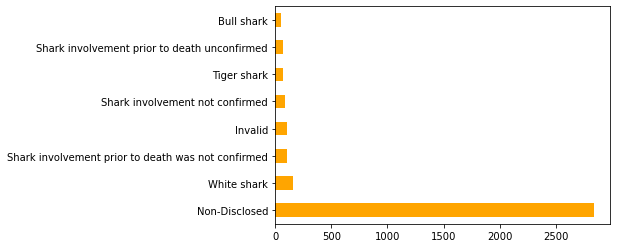

In [14]:
species_df = shark_df['Species'].value_counts()
species_df[species_df>50].plot.barh(color='orange')
plt.show()

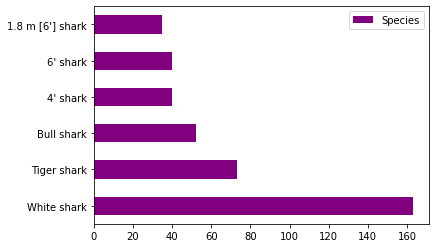

In [15]:
species_df = shark_df['Species'].value_counts().to_frame()
species_df=species_df.drop(['Non-Disclosed', 'Shark involvement prior to death was not confirmed','Invalid',
                            'Shark involvement not confirmed','Shark involvement prior to death unconfirmed',
                            'Questionable incident'])
species_df[species_df['Species']>34].plot.barh(color='purple')
plt.show()

# Date 

In [68]:
shark_df['Species'].value_counts() 

Non-Disclosed                                         1403
White shark                                            135
Shark involvement prior to death was not confirmed      82
Shark involvement not confirmed                         81
Invalid                                                 61
                                                      ... 
Bronze whaler shark, 4m                                  1
White shark, 5 m [16.5']                                 1
1.2 m to 1.5 m [4' to 5'] "reef shark"                   1
Zambesi shark, 1.7 m [5.5']                              1
Raggedtooth shark, 2 m [6'9"]                            1
Name: Species, Length: 1230, dtype: int64

In [17]:
shark_df["Date"] = shark_df["Date"].replace({"06-26-1890": "26-Jun-1890"})

In [18]:
#extract data only with the format day-month-year
shark_df['Cleaned Date']=shark_df['Date'].str.extract(r'(\d+-[\w]+-\d+)')
#extract day
shark_df['Day']=shark_df['Cleaned Date'].str.extract(r'(\d+)')
#extract month
shark_df['Month']=shark_df['Cleaned Date'].str.extract(r'(-\w+-)')
shark_df['Month']=shark_df['Month'].str.replace('-','')
shark_df["Month"] = shark_df["Month"].replace({"Sept": "Sep"})

## Year

In [20]:
shark_df['Year'] = shark_df['Year'].fillna(0)
shark_df['Year'] = shark_df['Year'].astype(int)
#extract the rows which the year is greater than 0
shark_df=shark_df[shark_df['Year']>1959]

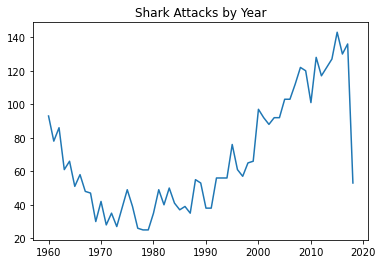

In [21]:
Years_values = shark_df['Year'].value_counts().sort_index()
Years_values.plot(title="Shark Attacks by Year")
plt.show()

## Month

In [22]:
shark_df["Month"] = shark_df["Month"].replace({"Sept": "Sep"})
shark_df["Month"] = shark_df["Month"].replace({"March": "Mar"})
shark_df["Month"] = shark_df["Month"].replace({"Ap": "Apr"})

In [23]:
shark_df.Month.value_counts()

Jul    408
Aug    388
Sep    383
Jun    347
Jan    316
Apr    312
Oct    310
Mar    262
May    260
Dec    259
Nov    243
Feb    242
Name: Month, dtype: int64

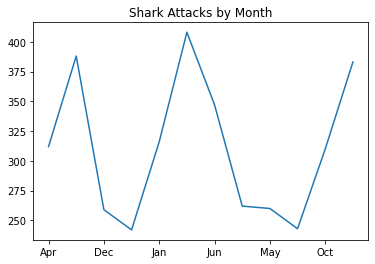

In [24]:
month_values = shark_df['Month'].value_counts().sort_index()
month_values.plot(title="Shark Attacks by Month")
plt.show()

## Day

In [25]:
shark_df["Day"] = shark_df["Day"].replace({"01": "1"})
shark_df["Day"] = shark_df["Day"].replace({"02": "2"})
shark_df["Day"] = shark_df["Day"].replace({"03": "3"})
shark_df["Day"] = shark_df["Day"].replace({"04": "4"})
shark_df["Day"] = shark_df["Day"].replace({"05": "5"})
shark_df["Day"] = shark_df["Day"].replace({"06": "6"})
shark_df["Day"] = shark_df["Day"].replace({"07": "7"})
shark_df["Day"] = shark_df["Day"].replace({"08": "8"})
shark_df["Day"] = shark_df["Day"].replace({"09": "9"})

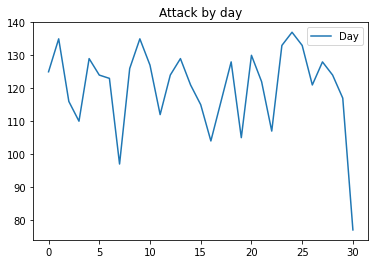

In [26]:
shark_df_day=shark_df.Day.value_counts()
new_day_df=shark_df_day.reset_index()
new_day_df['index']=new_day_df['index'].astype(int)
new_day_df=new_day_df.sort_values(by="index").reset_index(drop=True).drop(columns=['index'])
new_day_df.plot(kind="line",title="Attack by day")
plt.show()

# Type

In [27]:
shark_df.Type.value_counts()

Unprovoked      3037
Provoked         367
Invalid          343
Boat             111
Boating           92
Sea Disaster      78
Questionable       2
Boatomg            1
Name: Type, dtype: int64

In [28]:
shark_df["Type"] = shark_df["Type"].replace({"Boat": "Boating"})
shark_df["Type"] = shark_df["Type"].replace({"Boatomg": "Boating"})

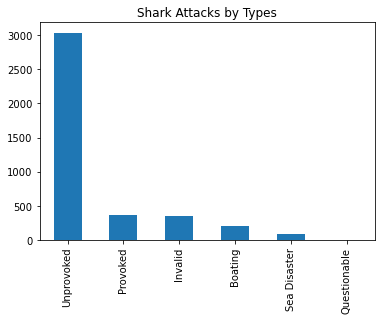

In [29]:
type_value=shark_df.Type.value_counts()
type_value.plot(kind="bar",title="Shark Attacks by Types")
plt.show()

# Need to finish Data Cleanup for Country, Area, Location

In [31]:
# Cleanup and normalize Countries
shark_df["Country"] = shark_df["Country"].replace({np.nan: "UNKOWN", "ST HELENA, British overseas territory": "ST HELENA", "ST. MAARTIN": "ST MARTIN", "ST. MARTIN": "ST MARTIN",
                                                   "Fiji": "FIJI", "Sierra Leone": "SIERRA LEONE", "MID-PACIFC OCEAN": "MID PACIFC OCEAN", "EGYPT ": "EGYPT", 
                                                   " TONGA": "TONGA", "EGYPT / ISRAEL": "EGYPT", "ANDAMAN ISLANDS": "ANDAMAN AND NICOBAR ISLANDS", 
                                                   "RED SEA / INDIAN OCEAN": "YEMEN", "ANDAMAN / NICOBAR ISLANDAS": "ANDAMAN AND NICOBAR ISLANDS", "YEMEN ": "YEMEN", 
                                                   "SUDAN?": "SUDAN", "IRAN / IRAQ": "IRAN", " PHILIPPINES": "PHILIPPINES", "REUNION": "REUNION ISLAND", 
                                                   "SOLOMON ISLANDS / VANUATU": "SOLOMON ISLANDS", "ITALY / CROATIA": "CROATIA", "Seychelles": "SEYCHELLES", 
                                                   "OCEAN": "JAPAN", "INDIAN OCEAN?": "INDIAN OCEAN", "EQUATORIAL GUINEA / CAMEROON": "CAMEROON", 
                                                   "Coast of AFRICA": "ST THOMAS", "Between PORTUGAL & INDIA": "MEDITERRANEAN SEA", "RED SEA?": "RED SEA", 
                                                   "ASIA?": "UNKNOWN", "CEYLON (SRI LANKA)": "SRI LANKA", "UNITED ARAB EMIRATES (UAE)": "UNITED ARAB EMIRATES",
                                                   "MEXICO ": "MEXICO", "NICARAGUA ": "NICARAGUA", "NORTH ATLANTIC OCEAN ": "NORTH ATLANTIC OCEAN", "PACIFIC OCEAN ": "PACIFIC OCEAN"})

In [39]:
# Cleanup and normalize Area
shark_df["Area"] = shark_df["Area"].replace({np.nan: "UNKNOWN", "165  miles from Bermuda": "Bermuda", " Kikori River mouth": "Ururumba", " La Libertad": "La Libertad", 
" Lau Province": "Lau Province", " Loyalty Islands": "Ouvea", " Manila Bay": "Manila", " New Jersey": "New Jersey", " North Carolina": "North Carolina", 
" Nusa Tenggara": "Nusa Tenggara", " Primorje-Gorski Kotar County": "Opatija", " Split-Dalmatia Count,": "Vis Island", " Split-Dalmatia County": "Omis", 
" Upolu Island": "Nu’ulua", "9.35N 79.35W": "Panama City", "800 miles from land": "Atlantic Ocean", "740 miles SE of Tarawa Atoll": "Tarawa Atoll", 
"600 nm west of the Canary Islands": "Canary Islands", "40 miles off Grand Bahama Island": "Grand Baham Island", "33N, 68W": "Bermuda", "300 miles from Antigua": "Antigua", 
"250 miles southwest of O'ahu, Hawaii": "Hawaii", "25 km off the coast of Iran & 483km from mouth of Persian Gulf": "Iran", "200 nm southeast of Manila": "Manila", "19S, 178?E": "Suva", 
"180 miles southeast of Okinawa": "Okinawa", "12 miles off the north coast": "Porta Plata", "Bimini": "Bimini Islands", "Between DR and Puerto Rico": "Mona Passage", 
"Between Beira & Maputo": "Beira", "Between Honiara & Isabel Island": "Honiara", "Between Somalia & Yemen": "Somalia", "Between Southampton & Canary Islands": "Canary Islands", 
"Between Timor & Darwin, Australia": "Timor", "Boi Island, Victoria": "Victoria", "Cap Vert Peninsula": "Cap-Vert Peninsula", "Chatham Islands, east of New  Zealand": "Chatham Islands", 
"Cikobia Island (north of Vanua Levu)": "Cikobia Island", "Cook islans": "Cook Islands", "Cook Strait": "Cook Islands", "East New Britain Province": "East New Britain", 
"East of the Gulf of Aqaba": "Gulf of Aqaba", "Eastern  Province": "Eastern Cape Province", "Eastern Cape  Province": "Eastern Cape Province", "Eastern Cape Province": "Eastern Cape Province", 
"Eastern Province": "Eastern Cape Province", "Enroute from Suez to Aden (Yemen)": "Suez", "Florida ": "Florida", "Florida Straits": "Florida", "Ganges-Brahmaputra delta": "Ganges-Brahmaputra", 
"Great Exuma": "Great Exuma Island", "Guerrrero": "Guerrero", "Guerro": "Guerrero", "Ha'api ": "Ha'api", "In the English Channel ": "English Channel", "Inhambane Province": "Inhambe Province", 
"KwaZulu-Natal between Port Edward and Port St Johns": "KwaZulu-Natal", "L'Etang-Salé": "L'Etang-Sale", "Ligurian Sea": "Ligurian", "Lomaloma, Lau": "Lau", "Luzon": "Luzon Island", 
"Madang (WO)": "Madang", "Marches region": "Marches Region", "Mexico / Caribbean Sea": "Mexico", "Miyako": "Miyako Island", "Near Bougainville (North Solomons)": "Bougainville", 
"New Ireland Province, Bismarck Archipelago": "New Ireland Province", "New Providence ": "New Providence", "New Providence District": "New Providence", "New Providence Island": "New Providence", 
"North & South Carolina": "North Carolina", "North Carolina ": "North Carolina", "Northwest Italy": "Italy", "Northwest of Viti Levu": "Viti Levu", "Off coast of West Africa": "West Africa", 
"Off Green Island": "Green Island", "Off the Coromandel Peninsula, North Island": "North Island", "Off the western coast of peninsular Malaysia": "Malaysia", "Off Vanua Levu": "Vanua Levu", 
"On the Kowloon penisula, south of Sai Kung": "Sai Kung", "Peter the Great Bay, Khasan, Primorsky Krai (Far East)": "Primorsky Krai", "Red Sea Protectorate": "Red Sea", "Saint-Gilles-les-Bains": "Saint-Gilles", 
"Saint-Paul ": "Saint-Paul", "San Blas coast": "San Blas Islands", "San Blas": "San Blas Islands", "Sea of Japan": "Japan", "Sharjah, ": "Sharjah", "South Carolina ": "South Carolina", 
"South China Sea 200 miles from Hong Kong": "Hong Kong", "South Island, near Karitane north of Dunedin": "South Island", "South Sinai Peninsula": "South Sinai", 
"South Sinai, Gulf of Aqaba": "South Sinai", "St John's": "St. John's", "Telyakovsky Bay, Khasan,  Primorsky Krai (Far East)": "Primorsky Krai", "Territory of Cocos (Keeling) Islands": "Keeling Islands", 
"Tokyo Bay": "Tokyo", "Tokyo Prefecture": "Tokyo", "Unknown, treated at Wick, SCOTLAND": "Wick", "Vava'u": "Vava", "Vavau": "Vavau", "Victoria ": "Victoria", "Wake Island (EnenKio)": "Wake Island", 
"West coast": "Talasea", "Westerm Australia": "Western Australia", "Western Area": "Western Australia", "Western Caroline Islands (North Pacific Ocean)": "Western Caroline Islands",
"10ºS, 142ºE": "Jukuataia Village", "Bougainville (North Solomons)": "Bougainville", "Cargados Carajos Shoals (St. Brandon)": "St. Brandon", "Lau Province": "Lau",
"Lau Group": "Lau", "Ligurian": "Liguria", "Lomaiviti  Island Group": "Lomaiviti Island Group", "South Coast, East New Britain": "South Coast", "St. Johns Reef": "St. Johns",
"Tuamotos": "Tuamotus", "Vava": "Vavau"})

In [40]:
# Cleanup and normalize Locations
locations = shark_df["Location"].unique()
for location in locations:
    print(location)

Oceanside, San Diego County
St. Simon Island, Glynn County
Habush, Oahu
Arrawarra Headland
La Ticla
Flat Rock, Ballina
Piedade Beach, Recife
Lighhouse Point Park, Ponce Inlet, Volusia County
Cocoa Beach, Brevard  County
Daytona Beach, Volusia County
Cairns Aquarium
Isle of Palms,  Charleston County
Hilton Head Island, Beaufort County
Off Land's End
Dugong Bay
Nahoon Beach, East London
Sharpes Beach, Ballina
Sai Noi Beach
Manuelita
Gearys Beach
Lennox Head
Surfers Point, Prevelly
South Point, Gracetown
Madoogali
Robberg Beach, Plettenberg Bay
Shipwrecks Beach, Keoneloa Bay, Kauai
Piedade
Lefthanders, Margaret River Area
Cobblestones, Margaret River Area
Nirvana Beach
Praia de Sauaçuhy, Maceió
Magenta Beach, Noumea
Bimini
St. Francis Bay
Kukio Beach
Waterman's Bay
Lorne
Winkipop
Durban
Little Congwong Beach, La Perouse 
Westernport Bay
Surf Beach, Kiama
Mooloolaba Beach
Espirito Santo
Santa Fe Island
Avalon Point, Manurah
Cone Bay
Nouville
Lizard Island
Martin Islet
Conceicao Beach
Hult

Palm Cove Beach
Point Lookout, Stradbroke Island
False Cape
Revolcadero Beach, Acapulco
Palm Island
Chongeone, Xai Xai
Aulong Channel
Marineland, Sydney
Basse Vallée
Stevens Reef, 70 miles from Mackay
Tabourie Beach
St. Croix, Cane Bay
Wanganui
Point Sur, Monterey County
Inhaca Island
Waimanu, Honoka'a, Hawai'i
Tasman Island
Laguna Beach, Orange County
Pancake Creek
Bird Rock, near Tomales Point, Marin County
Ahé Atoll
Nuulua
Wellington Point
Waihe'e, Wailuku, Maui
Wilson's Promontory, Waratah Bay
Elliot's Cove
Kosi Bay
Smokey Cape
Ft. Pierce, St Lucie County
Sea Ranch, Sonoma County
Ika
Manly Marineland, Sydney
Point Purisima, Santa Barbara County
Beesands
Watamu
Buffels Bay
Copacabana Beach, Acapulco
Dunedin
Ahvaz, on the Karun River
Inhasoka, Inhambe Bay
Inhambe Bay Estuary, 10 to 12 miles inland from the sea
Pisarach (Pisaras)
Brennecke Beach, Po'ipu, Kaua'i
Matanzas Inlet, St Johns County
Truk Lagoon
Outside barrier reef
Pinellas County
Between St. Kitts & Nevis
Dania, Broward Co

# Time 

In [36]:
shark_df.Time.unique()

array([1.8e+01, 1.4e+01, 7.0e+00,     nan, 1.7e+01, 1.5e+01, 8.0e+00,
       1.1e+01, 1.0e+01, 1.6e+01, 9.0e+00, 2.1e+01, 1.9e+01, 1.2e+01,
       1.3e+01, 2.3e+01, 6.0e+00, 2.0e+00, 1.3e+03, 2.2e+01, 4.0e+00,
       5.0e+00, 3.0e+00, 2.0e+01, 8.3e+02, 1.6e+03, 5.0e+02, 0.0e+00,
       2.0e+03, 3.0e+01, 1.0e+00])

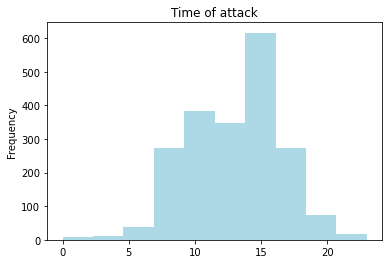

In [35]:
shark_df['Time'] = shark_df['Time'].str.extract("([0-9]+)", expand=False).dropna().astype(int)
shark_df_time = shark_df[shark_df['Time']<25]['Time']
shark_df_time.plot(kind='hist', color='lightblue', title= "Time of attack")
plt.show()

<h3>Get Lat and Long for each Location</h3>

In [63]:
shark_df["Lat"] = ''
shark_df["Lng"] = ''url = 'https://maps.googleapis.com/maps/api/geocode/json?'
apikey = '&key=' + gkey

33.1958696


In [78]:
#success = 0
#failure = 0
#for index, row in shark_df.iterrows():
#    try:
#        search_term = f'address={row["Location"]}'
#        response_status = requests.get(url+search_term+apikey)
#        response = response_status.json()
#        shark_df.at[index, 'Lat'] = response['results'][0]['geometry']['location']['lat']
#        shark_df.at[index, 'Lng'] = response['results'][0]['geometry']['location']['lng']
#        success = success + 1
#        print(f'Successful Request. {success} successes so far.')
#    except:
#        failure = failure + 1
#        print(f'Failed Request. {failure} failures so far.')
#print(f'Successes: {success}, Failures: {failure}')

Successes: 3837, Failures: 196


In [81]:
shark_df.to_csv("data_files/clean_data.csv", index=False, header=True)